In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [58]:
%load_ext rpy2.ipython

In [1]:
PATH = !pwd
PATH = PATH[0]
PATH

'/Users/mac-julia/Documents/mazin_hse/hw3'

In [100]:
!ls -l

total 848
-rw-------@ 1 mac-julia  staff  360888 Dec 11 21:18 HW_3.ipynb
-rw-r--r--@ 1 mac-julia  staff   64492 Nov 14  2021 readcounts.csv
-rw-r--r--@ 1 mac-julia  staff     994 Nov 14  2021 summary.csv


In [54]:
df_counts = pd.read_csv('readcounts.csv')
df_counts.head()

,Unnamed: 0,B14.5new.bam,B15.5new.bam,B17.5new.bam,B20new.bam,B34new.bam,C14.5new.bam,C15.5new.bam,C17.5new.bam,C20new.bam,C34new.bam
0,MSTRG.1,0,0,0,1,0,0,0,0,1,0
1,MSTRG.2,12,10,28,15,15,11,13,18,18,6
2,MSTRG.3,0,0,0,0,0,0,0,0,0,0
3,MSTRG.4,0,0,0,0,0,0,0,0,0,0
4,MSTRG.5,0,0,0,0,0,0,0,0,0,0


In [56]:
path_to_counts_df = f'{PATH}/readcounts.csv'
path_to_counts_df

'/Users/mac-julia/Documents/mazin_hse/hw3/readcounts.csv'

In [18]:
list_files = ['gene_name',
'B14.5',
'B15.5',
'B17.5',
'B20',
'B34',
'C14.5',
'C15.5',
'C17.5',
'C20',
'C34'
]

In [13]:
df_counts.columns

Index(['Unnamed: 0', 'B14.5new.bam', 'B15.5new.bam', 'B17.5new.bam',
       'B20new.bam', 'B34new.bam', 'C14.5new.bam', 'C15.5new.bam',
       'C17.5new.bam', 'C20new.bam', 'C34new.bam'],
      dtype='object')

In [22]:
rename_columns_dict = {i:j for (i, j) in zip(df_counts.columns, list_files)}
print(rename_columns_dict)
df_counts = df_counts.rename(columns=rename_columns_dict)
df_counts.head(5)

{'gene_name': 'gene_name', 'B14.5': 'B14.5', 'B15.5': 'B15.5', 'B17.5': 'B17.5', 'B20': 'B20', 'B34': 'B34', 'C14.5': 'C14.5', 'C15.5': 'C15.5', 'C17.5': 'C17.5', 'C20': 'C20', 'C34': 'C34'}


,gene_name,B14.5,B15.5,B17.5,B20,B34,C14.5,C15.5,C17.5,C20,C34
0,MSTRG.1,0,0,0,1,0,0,0,0,1,0
1,MSTRG.2,12,10,28,15,15,11,13,18,18,6
2,MSTRG.3,0,0,0,0,0,0,0,0,0,0
3,MSTRG.4,0,0,0,0,0,0,0,0,0,0
4,MSTRG.5,0,0,0,0,0,0,0,0,0,0


In [29]:
float('B20'.split('B20'[0])[1])

20.0

In [32]:
list_tissue = list()
list_age = list()
for name in df_counts.columns[1:]:
    print(name)
    list_tissue.append(name[0])
    list_age.append(float(name.split(name[0])[1]))

B14.5
B15.5
B17.5
B20
B34
C14.5
C15.5
C17.5
C20
C34


In [33]:
list_tissue

['B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']

In [35]:
list_age

[14.5, 15.5, 17.5, 20.0, 34.0, 14.5, 15.5, 17.5, 20.0, 34.0]

In [38]:
len(list_tissue)==len(list_age)

True

In [42]:
df = df_counts.drop('gene_name',axis = 1)
df

,B14.5,B15.5,B17.5,B20,B34,C14.5,C15.5,C17.5,C20,C34
0,0,0,0,1,0,0,0,0,1,0
1,12,10,28,15,15,11,13,18,18,6
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1514,8,2,2,4,0,0,3,0,1,5
1515,1,1,1,2,1,2,0,3,5,0
1516,0,0,0,0,0,0,0,0,0,0
1517,1,0,1,0,1,0,0,0,0,0


In [43]:
subdata = pd.DataFrame({'index':df.columns,'tissue':list_tissue, 'age':list_age})
subdata.set_index('index', inplace=True)
subdata

,tissue,age
index,,
B14.5,B,14.5
B15.5,B,15.5
B17.5,B,17.5
B20,B,20.0
B34,B,34.0
C14.5,C,14.5
C15.5,C,15.5
C17.5,C,17.5
C20,C,20.0


In [50]:
import random

number_of_colors = 2

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)

['#EDA916', '#2DCE0C']


In [70]:
subdata['color'] = subdata.tissue.apply(lambda x: 'red' if x == 'B' else  'green')

In [72]:
%R -i path_to_counts_df
%R -i subdata

In [73]:
%%R
d = read.csv(path_to_counts_df, sep='\t', row.names=1)
dim(d)

[1] 1519    0


In [74]:
%R d

""
"MSTRG.1,0,0,0,1,0,0,0,0,1,0"
"MSTRG.2,12,10,28,15,15,11,13,18,18,6"
"MSTRG.3,0,0,0,0,0,0,0,0,0,0"
"MSTRG.4,0,0,0,0,0,0,0,0,0,0"
"MSTRG.5,0,0,0,0,0,0,0,0,0,0"
...
"ENSMUSG00000090965,8,2,2,4,0,0,3,0,1,5"
"ENSMUSG00000091378,1,1,1,2,1,2,0,3,5,0"
"ENSMUSG00000099678,0,0,0,0,0,0,0,0,0,0"
"ENSMUSG00000117790,1,0,1,0,1,0,0,0,0,0"


In [79]:
%%R
data <- subdata
data

      tissue  age color
B14.5      B 14.5   red
B15.5      B 15.5   red
B17.5      B 17.5   red
B20        B 20.0   red
B34        B 34.0   red
C14.5      C 14.5 green
C15.5      C 15.5 green
C17.5      C 17.5 green
C20        C 20.0 green
C34        C 34.0 green


In [86]:
subdata.value_counts()

tissue  age   color
B       14.5  red      1
        15.5  red      1
        17.5  red      1
        20.0  red      1
        34.0  red      1
C       14.5  green    1
        15.5  green    1
        17.5  green    1
        20.0  green    1
        34.0  green    1
dtype: int64

In [89]:
query_str = str()
for name in df.columns.to_list():
    query_str += f'`{name}` + '
query_str = query_str[:-3]
query_str

'`B14.5` + `B15.5` + `B17.5` + `B20` + `B34` + `C14.5` + `C15.5` + `C17.5` + `C20` + `C34`'

In [90]:
d = df.query(f"{query_str} > 9")
d

,B14.5,B15.5,B17.5,B20,B34,C14.5,C15.5,C17.5,C20,C34
1,12,10,28,15,15,11,13,18,18,6
7,2,3,23,13,39,0,4,3,5,6
8,21,13,43,26,25,23,24,37,20,19
9,14,20,25,23,17,13,15,7,16,5
10,13,17,11,14,9,13,12,9,14,17
...,...,...,...,...,...,...,...,...,...,...
1492,0,1,1,2,6,6,2,8,6,3
1499,1,1,0,1,2,0,0,0,1,5
1500,11,14,22,12,1,10,19,19,15,0
1514,8,2,2,4,0,0,3,0,1,5


In [107]:
%%R
old.packages()

--- Пожалуйста, выберите зеркало CRAN для использования в этой сессии ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Australia (Perth) [https]
 6: Austria [https]
 7: Belgium (Brussels) [https]
 8: Brazil (PR) [https]
 9: Brazil (RJ) [https]
10: Brazil (SP 1) [https]
11: Brazil (SP 2) [https]
12: Bulgaria [https]
13: Canada (MB) [https]
14: Canada (ON 3) [https]
15: Chile (Santiago) [https]
16: China (Beijing 2) [https]
17: China (Beijing 3) [https]
18: China (Hefei) [https]
19: China (Hong Kong) [https]
20: China (Guangzhou) [https]
21: China (Jinan) [https]
22: China (Lanzhou) [https]
23: China (Nanjing) [https]
24: China (Shanghai 2) [https]
25: China (Shenzhen) [https]
26: Colombia (Cali) [https]
27: Costa Rica [https]
28: Cyprus [https]
29: Czech Republic [https]
30: Denmark [https]
31: East Asia [https]
32: Ecuador (Cuenca) [https]
33: Ecuador (Quito) [https]
34: France (Ly

In [108]:
%R -i d
%R d

,B14.5,B15.5,B17.5,B20,B34,C14.5,C15.5,C17.5,C20,C34
1,12,10,28,15,15,11,13,18,18,6
7,2,3,23,13,39,0,4,3,5,6
8,21,13,43,26,25,23,24,37,20,19
9,14,20,25,23,17,13,15,7,16,5
10,13,17,11,14,9,13,12,9,14,17
...,...,...,...,...,...,...,...,...,...,...
1492,0,1,1,2,6,6,2,8,6,3
1499,1,1,0,1,2,0,0,0,1,5
1500,11,14,22,12,1,10,19,19,15,0
1514,8,2,2,4,0,0,3,0,1,5


In [112]:
%%R
#d = d[,-1] # we do not need gene length
d = as.matrix(d)
m = data.frame(tissue=substr(colnames(d),1,1),age=as.numeric(sub('_','.',substr(colnames(d),2,10))))
m$col=ifelse(m$tissue=='B','orange','blue')
rownames(m) = colnames(d)
m

      tissue  age    col
B14.5      B 14.5 orange
B15.5      B 15.5 orange
B17.5      B 17.5 orange
B20        B 20.0 orange
B34        B 34.0 orange
C14.5      C 14.5   blue
C15.5      C 15.5   blue
C17.5      C 17.5   blue
C20        C 20.0   blue
C34        C 34.0   blue



TRUE 
 939 


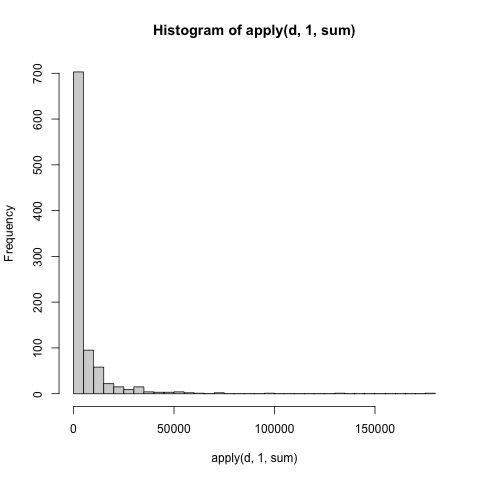

In [114]:
%%R
hist(apply(d,1,sum),40)
table(apply(d,1,sum)>9)

In [115]:
%%R
d = d[apply(d,1,sum)>9,] # I'll retain only genes with at leats 10 reads in total
d

     B14.5 B15.5 B17.5   B20   B34 C14.5 C15.5 C17.5   C20   C34
1       12    10    28    15    15    11    13    18    18     6
7        2     3    23    13    39     0     4     3     5     6
8       21    13    43    26    25    23    24    37    20    19
9       14    20    25    23    17    13    15     7    16     5
10      13    17    11    14     9    13    12     9    14    17
11       9    10    10     6     1     7    11     6     1    10
12     241   237   209   194   169   215   198   213   219   197
13     392   316   265   310   263   285   355   400   296   289
14     477   410   512   573   509   497   524   316   729   444
15       6     4    12     6    15     2     9     4     3     2
16       2     4     9    10     3     5     9    13     8     3
17      11    25    14    33    38     8    12    68    55    12
18    2842  2312  2249  1970  1458  2427  1941  1389  1746  1797
19     108   116   101   100    73    91   104    40    67   134
23     486   435   430   

150      3     3     1     1     1     3     2     2     4     2
152     34    58    42    71    64    36    47    45    69    33
153    272   247   205   145   173   169   175   218   182   236
154    822   763   676   758   668   787   748   886   775   720
155    447   558   548   447   337   339   455   541   441   352
156   2040  2363  2107  2087  1352  1563  2595  2277  2666   998
158    293   274   319   232   266   199   318   232   260   305
160    439   503   491   515   436   477   445   752   642   230
161      0     2     6     2     0     3     1     2     1     0
162   1307  1529  1213  1123   563   794  1271  1325  1047   303
163    772   667   755   539   448   475   679   519   892  1995
164    921  1016  1083  1078  1070   939  1144  1578  1246  1122
165     12     6     7     6     2    11     5    16     3     9
166     90    81    67    71    35   142    75    86    55    31
167   5485  5002  4865 11943 12379  7463  4254  4126  7154 10056
169    104   119   148   

292     21    10     9     8     1    15    16     6     4     0
293   1329  1264  1274  1204   886  1280  1253  1206  1149  1313
294   4287  4213  3771  2835  1903  3724  3569  2871  2550  2428
295    350   379   277   300   219   318   368   299   351   197
297    609   464   387   441   511   492   446   557   455   610
298     65    71    55    60    35    55    72    66    76    36
299   1080   928   859   759   476   909   751   580   708   661
300   5319  5148  5362  5582  4583  6524  4809  4995  5263  5201
301   1184  1579  1905  2410  2570  1491  2321  4370  3118  1313
302   1552  1411  1626  1394  1052  1246  1136  1526  1039   835
303    154   139   118   122   155   186   145   176   135   174
304   4087  3508  3044  2806  2189  3494  3426  2806  3098  2642
305     12    14     9    11     1     8     5     9     7     5
307    894   935   904   925  1340   859   985  1586  1119  1302
308     19    23    24    32    34    21    26    26    33   109
309   3160  2948  2510  1

458     16    19     9     2    13     5     6     5    10     5
461      7    13    14    12    40     9     9    13    11    77
462    449   441   496   547  1046   588   424   237   493  1141
463      4     7     3    16     8    11     8     3    12     4
464     23    38    27    23    13    17    29    20    14    16
466      2     3     0     1     0     7     0     5     5     0
467      4     4     5     0     2    10     0     6     4     0
468    109   141   212   307  1006   256   230   220   528  3243
471     10    21    18    25    52    23    18     8    30   353
472    698   700   531   485   751   639   642   699   617  1009
473    122   174   212   341   305   182   247   200   420    93
474      0     2     2     3     1     1     2     2     0     1
475   5191  4527  2915  3536  1648  3617  3652  3145  3449  1413
476    134   129   149   129   186   164   182   111   204   194
477    859   692   474   358   175   550   537   529   406   197
478     51    47    41   

633     35    35    45    55   251    64    53    27    89   528
634    140   174   226   207   334   177   220   170   267   533
635      3     0     4     2     0     0     6     0     0     3
636     12    14    10    10     6    13    12     9     6    15
637     30    18    18    40    22    36    37    23    45    21
638   4820  3720  2528  2508  1449  3099  3454  3571  2971  2166
639    370   433   361   515   706   473   478   544   590   563
640     12     9    12    17    37    13     4     4    12    14
641     15    33    37    40   153    28    42    20    66   160
642   1569  1427  1317  1521  1849  2009  1341  1284  1594  2022
643   1974  1962  2180  2847  3388  2413  2104  1660  2660  2121
644      0     1     0     1     0     1     1     4     3     0
645     57    54    47    67    57    60    60    63    82    44
647      8     8    14    13     3     8     4     3     9     9
648    113    86   128   119   133   165   113   135   206   208
652    397   352   262   

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



   157   138   177   182   187   143
897      4     3     3     2     2     6     6     4     3     4
898     11     5     1     1     0     4     4     4     1     0
899   4051  3580  3556  4250  2607  4753  3263  2645  3637  2776
901    102   184   299   580  1519    90   127   246   300   209
902    392   391   421   445   380   487   437   408   485   331
903      0     0     1     5     2     1     3     0     1     2
904    676   582   280   363   167   509   471   381   628   390
905     24    20    16    17    14    33    20    15    10     9
907     24    22    36    47    59    30    33    56    69    85
908   6324  6051  4883  3476  1646  4253  4318  3383  2601  1650
909    946   943  1085   803   483   656   886   830   850   338
910   1658  1358  1377  1211   800  1353  1293  1167  1048   746
912      0     1     0     1     1    16    29    35    18     2
913   1677  1683  1836  1860  1730  1844  2023  1903  1979  1609
914     54    60    51    44    33    31    44    75 

1150     4     2     4     1     0     3     9     0     3     3
1154     3     5     5    10     3     4     3     5     7     5
1169    13    14    16    22    20    23    20    32    32    18
1173     6     2     5     4     0     9     3     0     3     1
1179     2     0     1     0     0     3     2     3     6     0
1187     3     1     5     4     3     6     4     0     0     0
1194     0     0     1     2     0     1     3     1     2     0
1219     2     6     1     4     4     3     3     2     3     1
1252    16    13    12    17     9    16    11    15    18     8
1308     3     3     1     0     0     1     1     1     3     0
1309     1     3     1     1     0     4     3     1     2     1
1327     8     2     6     3     7     9    10     8     8    11
1331     1     0     3     2     3     1     1     0     1     4
1335     4     2     2     6     2     4     3     0     2     5
1341     1     3     1     2     1     1     0     2     1     2
1344     8     2     0   

In [116]:
%%R

if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

BiocManager::install("edgeR")
library(edgeR)  

R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.csiro.au


R[write to console]: Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.1 (2022-06-23)

R[write to console]: Installing package(s) 'edgeR'

R[write to console]: устанавливаю также зависимости ‘limma’, ‘locfit’


R[write to console]: пробую URL 'https://bioconductor.org/packages/3.16/bioc/bin/macosx/contrib/4.2/limma_3.54.0.tgz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2914101 bytes (2.8 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write t


Скачанные бинарные пакеты находятся в
	/var/folders/zn/n2d2qpcj7qb1lmqnh250v_6w0000gn/T//RtmpnIuIfx/downloaded_packages


R[write to console]: Загрузка требуемого пакета: limma



In [119]:
%%R

BiocManager::install("locfit")
library(locfit) 

R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.csiro.au


R[write to console]: Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.1 (2022-06-23)

R[write to console]: locfit 1.5-9.6 	 2022-07-11



In [120]:
%%R

BiocManager::install("limma")
library(limma) 

R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.csiro.au


R[write to console]: Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.1 (2022-06-23)



In [121]:
%%R
edger = DGEList(d)
edger
# edger = calcNormFactors(edger,method='RLE')
# edger$samples

An object of class "DGEList"
$counts
   B14.5 B15.5 B17.5 B20 B34 C14.5 C15.5 C17.5 C20 C34
1     12    10    28  15  15    11    13    18  18   6
7      2     3    23  13  39     0     4     3   5   6
8     21    13    43  26  25    23    24    37  20  19
9     14    20    25  23  17    13    15     7  16   5
10    13    17    11  14   9    13    12     9  14  17
934 more rows ...

$samples
      group lib.size norm.factors
B14.5     1   486168            1
B15.5     1   465416            1
B17.5     1   460806            1
B20       1   479692            1
B34       1   490885            1
C14.5     1   479663            1
C15.5     1   459360            1
C17.5     1   490151            1
C20       1   492343            1
C34       1   488854            1



In [122]:
%%R
edger = calcNormFactors(edger,method='RLE')
edger$samples

      group lib.size norm.factors
B14.5     1   486168    1.0252884
B15.5     1   465416    1.0442919
B17.5     1   460806    1.0417597
B20       1   479692    1.0248167
B34       1   490885    0.8980984
C14.5     1   479663    1.0198438
C15.5     1   459360    1.0460448
C17.5     1   490151    0.9514285
C20       1   492343    1.0334370
C34       1   488854    0.9286462


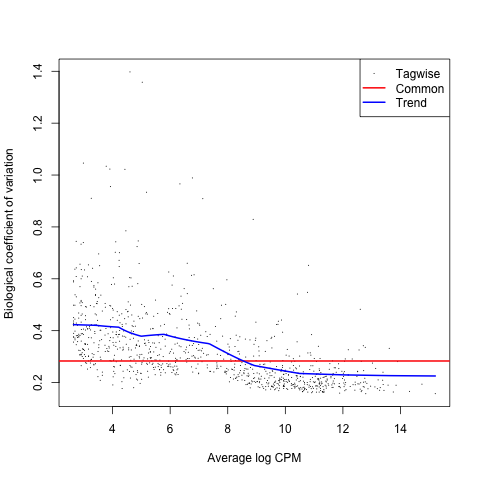

In [123]:
%%R
design = model.matrix(~ tissue + age + tissue:age,data = m)
edger = estimateDisp(edger,design) 
plotBCV(edger)

In [126]:
%R glm = glmFit(edger,design)

o{'coefficients': [[-1.04391920e+01  6.63933421e-01  6.96037390e-03 -4.38715336e-02]
 [-1.25850764e+01 -3.65883022e-01  1.00951109e-01 -4.60729908e-02]
 [-1.00479788e+01  4.63129298e-01  1.06471059e-02 -2.49549111e-02]
 ...
 [-8.42349435e+00  8.28177637e-01 -1.17604776e-01 -4.43916619e-02]
 [-9.14204445e+00 -5.27332358e+00 -1.54020877e-01  2.41186713e-01]
 [-1.28856813e+01  1.75363288e+00  4.26740850e-03 -6.71304251e-02]], 'fitted.values': [[16.00522271 15.71591871 15.74188865 ... 13.77218007 13.6859498
   7.23671079]
 [ 7.25182447  7.82872528  9.47849861 ...  2.7679672   3.47928428
   6.85920602]
 [25.04061589 24.67874112 24.90232815 ... 24.84231965 26.14677284
  19.07326647]
 ...
 [19.88523468 17.18093399 13.32415955 ... 13.61768491  9.74531771
   0.81962824]
 [ 5.74658719  4.70654227  3.27979612 ...  1.04962616  1.4437337
   4.71370579]
 [ 1.21383574  1.18916472  1.18567911 ...  2.14811627  1.97165864
   0.66820154]], 'deviance': [ 5.44599522  9.80564961  5.79633799  3.92650436  1.4

In [128]:
%R design

array([[ 1. ,  0. , 14.5,  0. ],
       [ 1. ,  0. , 15.5,  0. ],
       [ 1. ,  0. , 17.5,  0. ],
       [ 1. ,  0. , 20. ,  0. ],
       [ 1. ,  0. , 34. ,  0. ],
       [ 1. ,  1. , 14.5, 14.5],
       [ 1. ,  1. , 15.5, 15.5],
       [ 1. ,  1. , 17.5, 17.5],
       [ 1. ,  1. , 20. , 20. ],
       [ 1. ,  1. , 34. , 34. ]])

In [129]:
%%R

pv = cbind(tissue   = glmLRT(glm,2)$table$PValue, 
           age   = glmLRT(glm,3)$table$PValue,
           tissue_age   = glmLRT(glm,4)$table$PValue)
rownames(pv) = rownames(d)
qv = apply(pv,2,p.adjust,m='BH') # сделаем поправку на множественное тестирование
apply(qv < 0.05,2,sum) # количество генов значимых для каждого фактора

    tissue        age tissue_age 
        10        219         12 


In [144]:
%%R
cpm = cpm(edger) # посчитаем cpm с учетом RLE нормировки
qv[order(qv[,3])[1:10],] # 10 самых значмых генов для tissue_age
# plot(m$age,cpm[0,],pch=19,col=m$col,log='x') # экспрессия растет в в коре но не в мозжечке. Правда изменения наблюдаются только в одном образце, поэтому нужны повторы
cpm

            B14.5        B15.5       B17.5          B20          B34
1       24.074031    20.574856    58.32736    30.512837    34.024174
7        4.012339     6.172457    47.91176    26.444459    88.462851
8       42.129554    26.747313    89.57416    52.888918    56.706956
9       28.086370    41.149712    52.07800    46.786350    38.560730
10      26.080200    34.977255    22.91432    28.478648    20.414504
11      18.055523    20.574856    20.83120    12.205135     2.268278
12     483.486791   487.624083   435.37209   394.632695   383.339022
13     786.418349   650.165444   552.02682   630.598637   596.557177
14     956.942736   843.569089  1066.55747  1165.590384  1154.553624
15      12.037016     8.229942    24.99744    12.205135    34.024174
16       4.012339     8.229942    18.74808    20.341892     6.804835
17      22.067862    51.437140    29.16368    67.128242    86.194573
18    5701.533029  4756.906668  4684.93703  4007.352629  3307.149672
19     216.666280   238.668328   2

142    457.406591   497.911511   495.78258   471.931883   313.022397
143    922.837858   946.443368   789.50251   703.829447   573.874394
144      4.012339     6.172457     4.16624     2.034189     0.000000
145  29837.755363 28549.669951 30494.79465 29625.930809 29077.058744
146   1372.219772  1911.404107  2101.86815  1887.727533  2247.863735
147     60.185078    59.667082    79.15856    58.991485    65.780069
148     88.271447   102.874279    93.74040   105.777836    74.853182
149     60.185078    49.379654    64.57672    63.059864    63.511791
150      6.018508     6.172457     2.08312     2.034189     2.268278
152     68.209755   119.334164    87.49104   144.427430   145.169807
153    545.678038   508.198939   427.03961   294.957427   392.412135
154   1649.071129  1569.861500  1408.18916  1541.915377  1515.209864
155    896.757658  1148.076955  1141.54980   909.282551   764.409766
156   4092.585285  4861.838433  4389.13398  4245.352760  3066.712179
158    587.807592   563.751050   6

275     30.092539     6.172457     6.24936     2.034189     2.268278
276     96.296124    74.069481    70.82608    89.504323    61.243512
277     40.123385    20.574856     8.33248     8.136757    13.609669
278     10.030846    12.344913     2.08312     8.136757    13.609669
279     20.061693    12.344913    10.41560    18.307702     4.536556
280     10.030846     6.172457     6.24936     8.136757     0.000000
281    278.857527   160.483875   158.31713   176.974456    83.926295
282      4.012339    18.517370    16.66496    22.376081    11.341391
283    142.438017    98.759308    95.82352    46.786350    88.462851
284    264.814342   487.624083  1189.46156  1023.197143  1331.479326
285    282.869865   458.819285   787.41939   740.444851   163.316033
286     18.055523     6.172457    24.99744    48.820540    58.975234
287    154.475033   304.507866   814.49995  1507.334162  5593.574137
289   2754.470390  2989.526552  3374.65451  3014.668323  4005.779370
290   1600.923067  1205.686552   8

428      2.006169     0.000000     4.16624    10.170946     0.000000
429   4953.231896  4079.993911  3924.59821  3777.489255  5541.403737
430     34.104877    14.402399    12.49872    24.410270    20.414504
431    413.270867   323.025237   579.10738   390.564317   537.581943
432     46.141893    12.344913    27.08056    14.239324    22.682782
433     92.283786    55.552111    97.90664    52.888918    65.780069
434     10.030846    26.747313    22.91432    10.170946     2.268278
435     30.092539    37.034740    18.74808    32.547026    22.682782
436      8.024677     6.172457     2.08312    10.170946     6.804835
438     66.203585   100.816794   110.40536    71.196620    24.951061
439     24.074031    28.804798    31.24680    26.444459    18.146226
440     42.129554    59.667082   110.40536    71.196620    29.487617
441     60.185078    39.092226    31.24680    48.820540    43.097287
442     14.043185    12.344913     2.08312    20.341892    20.414504
443   2260.952753  2759.088167  29

594     18.055523    12.344913    18.74808    20.341892    27.219339
595    501.542314   409.439631   412.45777   476.000262   351.583127
596     10.030846     4.114971    10.41560    10.170946     6.804835
598   9800.136822  7042.773151  5097.39480  5964.242594  3118.882578
599     32.098708    14.402399    43.74552    28.478648     9.073113
600     84.259109    88.471880   102.07288    79.333377     4.536556
601    114.351648   123.449135   162.48337   109.846214    11.341391
602   2664.192774  2901.054672  3545.47035  3478.463450  1653.574836
603     10.030846     6.172457     4.16624     2.034189     2.268278
604     18.055523    30.862284    22.91432    30.512837     9.073113
606    993.053782   999.937993   702.01146   744.513230   430.972865
607     56.172739    61.724567    52.07800    69.162431    31.755895
608     16.049354     2.057486     4.16624    12.205135     6.804835
609      2.006169     2.057486     4.16624     0.000000     0.000000
610     38.117216    24.689827    

748     14.043185    14.402399     8.33248    28.478648     9.073113
749      0.000000     0.000000     0.00000     2.034189     0.000000
750     30.092539    22.632341     8.33248    12.205135    22.682782
751     32.098708    34.977255    31.24680    24.410270    24.951061
752     46.141893    37.034740    70.82608    16.273513    31.755895
753     62.191247    92.586851    56.24424    69.162431    52.170399
755     22.067862    24.689827    33.32992    20.341892    29.487617
756     34.104877    24.689827    43.74552    67.128242   199.608485
757   2164.656629  2209.739516  2651.81184  2264.052526  6514.495102
758    172.530556   100.816794    93.74040    52.888918   140.633251
759   7621.437008  7921.319495  8482.46491  8431.714035  7471.708519
761     70.215924    72.011995    93.74040    85.435944    45.365565
762   2718.359344  2538.937210  2201.85791  1773.812940   895.969904
763   1139.504138  1178.939239   881.15979  1082.188629   827.921557
764    140.431848   141.966505   1

890   3895.980698  3925.682493  3072.60210  4668.464104  4139.607786
891      4.012339     2.057486     0.00000     6.102567     6.804835
892   3651.228048  2911.342100  2076.87071  1887.727533  1100.114946
893      0.000000     0.000000     2.08312     2.034189     0.000000
894    361.110466   288.047982   218.72761   219.692428   201.876763
895    369.135143   399.152203   329.13297   388.530128   655.532411
896    232.715634   279.818039   295.80305   331.572832   356.119683
897      8.024677     6.172457     6.24936     4.068378     4.536556
898     22.067862    10.287428     2.08312     2.034189     0.000000
899   8126.991661  7365.798388  7407.57496  8645.303896  5913.401369
901    204.629264   378.577347   622.85290  1179.829708  3445.514645
902    786.418349   804.476863   876.99355   905.214173   861.945731
903      0.000000     0.000000     2.08312    10.170946     4.536556
904   1356.170418  1197.456609   583.27362   738.410662   378.802466
905     48.148062    41.149712    

1036    30.092539    30.862284    24.99744    38.649594    18.146226
1038   343.054943   333.312664   272.88873   351.914723   258.583719
1039     8.024677     8.229942    12.49872    22.376081    45.365565
1040   455.400421   333.312664   364.54601   457.692559   440.045978
1041  1534.719482  1238.606321  1147.79916  1094.393764   746.263541
1042    56.172739    84.356909    87.49104   158.666754   573.874394
1044  2142.588767  2006.048444  2345.59319  1928.411316  2188.888500
1045    30.092539    57.609596    91.65728    67.128242    34.024174
1046   246.758819   329.197693   714.51018   618.393502   895.969904
1048  1945.984180  3069.768490  5159.88840  6354.806911  4910.822387
1050    28.086370    41.149712    60.41048    71.196620    74.853182
1051     8.024677     6.172457    20.83120    22.376081     6.804835
1052  1554.781174  1615.126183  1626.91677  1539.881188  1279.308927
1053    28.086370    20.574856    39.57928    32.547026    11.341391
1054   674.072870   878.546344  10

9       26.575012    31.216759    15.010391    31.446203    11.013885
10      26.575012    24.973407    19.299074    27.515428    37.447209
11      14.309622    22.892290    12.866049     1.965388    22.027770
12     439.509813   412.061219   456.744744   430.419908   433.947072
13     582.606031   738.796630   857.736608   581.754762   636.602558
14    1015.983149  1090.505449   677.611920  1432.767639   978.032995
15       4.088463    18.730055     8.577366     5.896163     4.405554
16      10.221158    18.730055    27.876440    15.723102     6.608331
17      16.353854    24.973407   145.815223   108.096324    26.433324
18    4961.350309  4039.448619  2978.490371  3431.566939  3958.390297
19     186.025084   216.436196    85.773661   131.680976   295.172120
23     592.827190   636.821884   400.991864   566.031660   277.549904
24       4.088463     0.000000     0.000000     3.930775     2.202777
25      53.150024    20.811173    36.453806    19.653877    50.663871
26     611.225275   

145  23328.772032 28315.681559 36243.660363 24502.488562 14674.900478
146   1911.356629  2318.364637  3330.162380  2425.288432  3079.482268
147     67.459646    74.920222    40.742489    94.338610    85.908304
148    108.344280   118.623684    47.175513    94.338610    92.516635
149    102.211584    52.027932    66.474587    62.892407   191.641600
150      6.132695     4.162235     4.288683     7.861551     4.405554
152     73.592341    97.812512    96.495368   135.611752    72.691642
153    345.475155   364.195522   467.466451   357.700563   519.855376
154   1608.810339  1556.675717  1899.886586  1523.175474  1585.999451
155    692.994542   946.908357  1160.088762   866.735979   775.377509
156   3195.134130  5400.499313  4882.665640  5239.723631  2198.371462
158    406.802106   661.795291   497.487233   511.000804   671.846990
160    975.098516   926.097185  1612.544823  1261.778909   506.638714
161      6.132695     2.081117     4.288683     1.965388     0.000000
162   1623.119961  2

277     59.282719     2.081117     8.577366     3.930775    13.216662
278     22.486549     8.324469     0.000000     5.896163     0.000000
279     28.619244    16.648938    19.299074     5.896163    13.216662
280     14.309622    10.405586     4.288683     0.000000     0.000000
281    537.632934   224.760665   141.526540   112.027099    46.258317
282     36.796170    79.082456     6.433025    27.515428    28.636101
283     83.813499    87.406925    92.206685    56.996244   101.327743
284    308.678985   880.312605   647.591139  1198.886502   927.369124
285    412.934801  1005.179641     4.288683   742.916554    79.299973
286     12.265390    14.567821     8.577366    13.757714     4.405554
287     18.398085    64.514635    30.020781    64.857794    77.097196
289   2471.476112  2936.456466  3621.792826  3307.747513  3022.210065
290   1300.131354   907.367129   731.220458   764.535819   722.510861
291    756.365725   790.824562  1085.036809   746.847329   687.266429
292     30.663475   

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     5.896163     0.000000
620     18.398085    16.648938    21.443415    15.723102    17.622216
621    269.838583   199.787258   338.805960   261.396565   409.716525
622    464.040593   228.922900   373.115424   283.015830   526.463707
623      6.132695     2.081117     8.577366     3.930775     2.202777
624     38.840402    64.514635    30.020781    31.446203     2.202777
625    392.492484   347.546584   210.145469   371.458277   618.980341
627     18.398085    18.730055     4.288683    13.757714    19.824993
628   3056.126375  2316.283520  1962.072490  2014.522401  2508.963021
630     30.663475    29.135642    32.165123    25.550040    26.433324
633    130.830828   110.299215    57.897221   174.919506  1163.066264
634    361.829009   457.845799   364.538058   524.758518  1174.080149
635      0.000000    12.486704     0.000000     0.000000     6.608331
636     26.575012    24.973407    19.299074    11.792326    33.041655
637     73.592341    77.001339    49.319855    88.442447    46.

772   1067.088942   749.202217   563.961820   530.654681   416.324856
773   1204.052465   759.607803   248.743616   650.543332   821.635827
774     12.265390    18.730055    42.886830    29.480816    37.447209
775     98.123121   106.136981    66.474587    58.961631   204.858262
777      4.088463     0.000000     0.000000     0.000000  1218.135690
778    202.378937   104.055863    96.495368    86.477059    96.922189
779     51.105792    31.216759    12.866049    27.515428    52.866648
780   7156.855142  5048.790494  4616.767291  5497.189421  6951.964261
781     67.459646    87.406925    51.464196    90.407835    66.083310
783     67.459646    77.001339    45.031172    66.823182   392.094309
784   3751.165149  2039.494923   729.076117  1098.651729  1387.749520
785  11924.003441  8426.443821  9651.681179  9628.434384 10910.354558
786     16.353854     0.000000     2.144342     7.861551     8.811108
787    556.031019   403.736750   347.383326   387.181379   299.577674
788   4358.301960  5

913   3769.563234  4210.100235  4080.681912  3889.502275  3544.268218
914     63.371182    91.569160   160.825614    82.546284    48.461094
916     16.353854    18.730055    12.866049     9.826939    17.622216
917     96.078889   156.083795    96.495368   112.027099   125.558290
918   4711.954043  7127.826646 11337.133614  9477.099530  3260.109983
919    102.211584   131.110388   223.011518   149.369466   191.641600
920   2424.458783  2495.259605  3947.732737  2393.842229  2158.721475
921    149.228913   178.976085   340.950302   241.742688   416.324856
923     12.265390    20.811173    25.732098    11.792326    17.622216
925   7222.270556  7285.991558  9315.019561  7955.889444  5258.028736
926    956.700430  1136.290029   746.230849   929.628386   533.072038
927     32.707707    31.216759    53.608538    17.688489    22.027770
928     34.751939    52.027932    40.742489    39.307754    13.216662
929   1304.219817  1881.330011  2000.670638  1682.371878  1251.177345
930     67.459646   

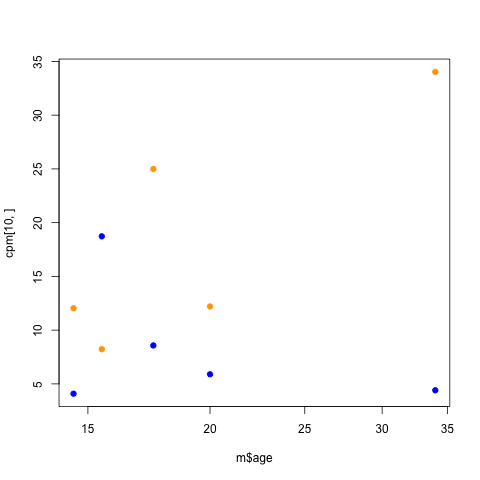

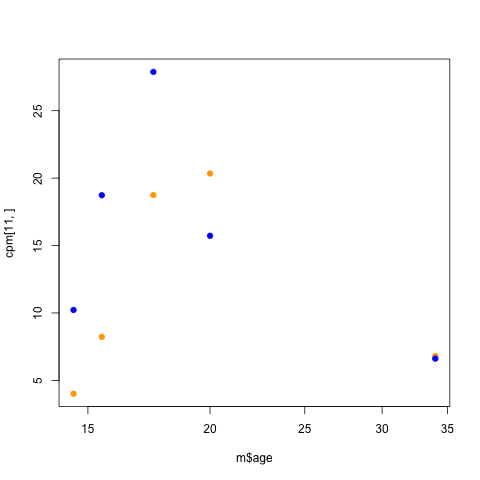

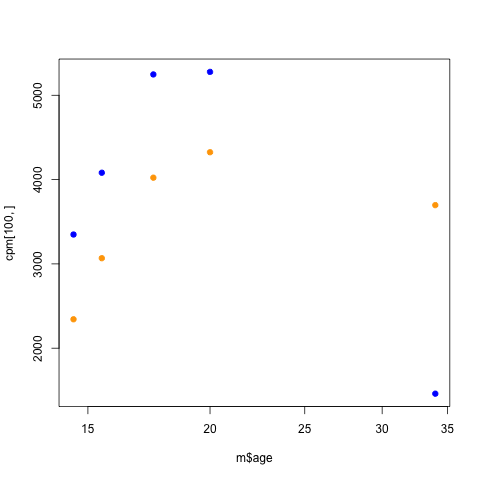

In [164]:
%%R

plot(m$age,cpm[10,],pch=19,col=m$col,log='x') 
plot(m$age,cpm[11,],pch=19,col=m$col,log='x')
plot(m$age,cpm[100,],pch=19,col=m$col,log='x')# экспрессия растет в в коре но не в мозжечке. Правда изменения наблюдаются только в одном образце, поэтому нужны повторы

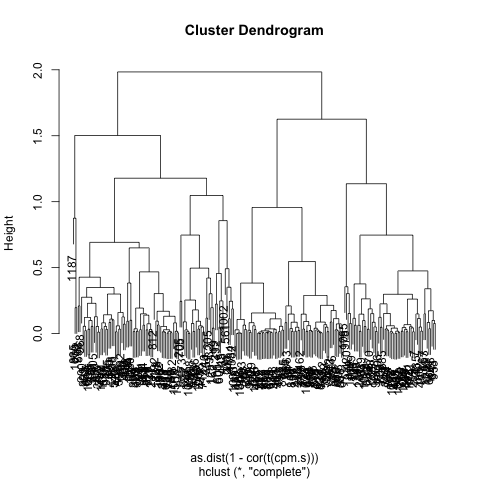

In [147]:
%%R
cpm.s = cpm[apply(qv,1,min)<0.05,] # take significant genes
cpm.s = t(scale(t(cpm.s))) # z-score

hcl = hclust(as.dist(1-cor(t(cpm.s)))) # иерархическая кластеризация

plot(hcl)

In [148]:
%%R
cl = cutree(hcl,6) # режем дерево на 6 кластеров
table(cl) # количетсво генов в кластерах

cl
 1  2  3  4  5  6 
52 63 68 34  5  3 


/var/folders/zn/n2d2qpcj7qb1lmqnh250v_6w0000gn/T/ipykernel_16102/1775044186.py:4: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 2.8**10)
/var/folders/zn/n2d2qpcj7qb1lmqnh250v_6w0000gn/T/ipykernel_16102/1775044186.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([i for i in range(9)])


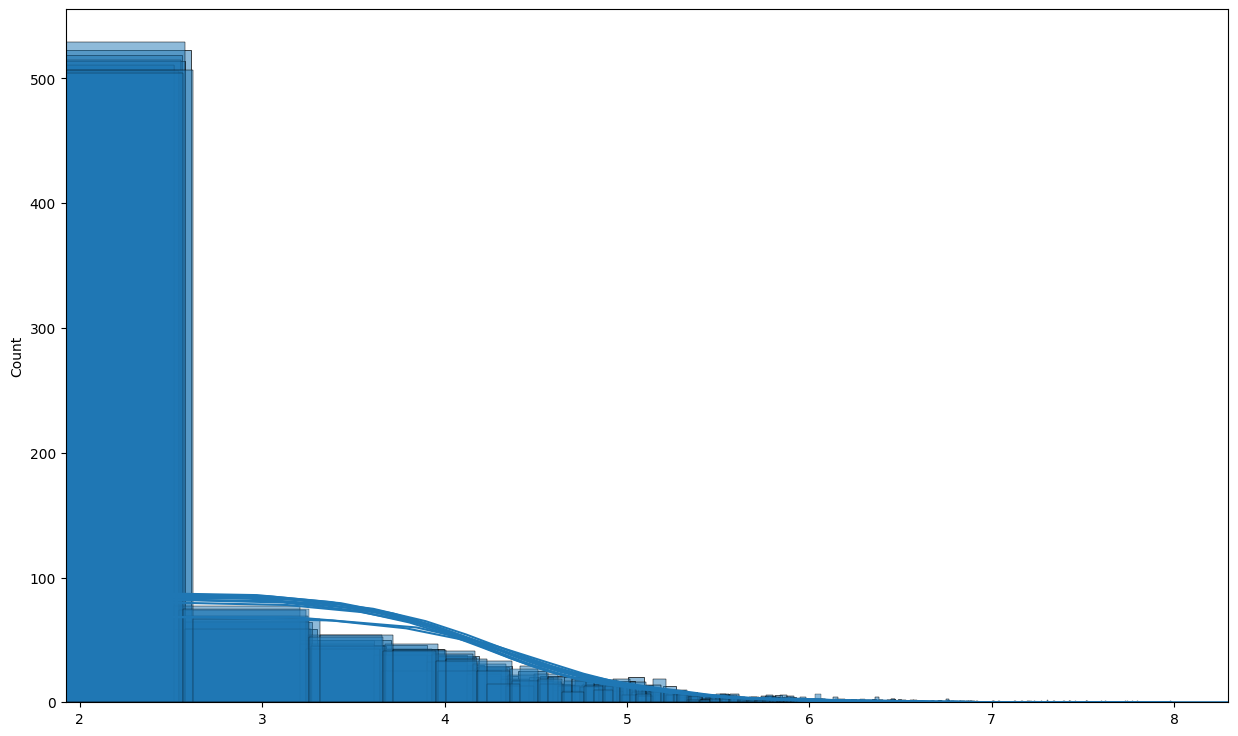

In [124]:
fig, ax = plt.subplots(figsize=(15, 9))
[sns.histplot(d[i], kde=True, ax=ax) for i in d.columns]
ax.set_xscale('log', base=2.718)
ax.set_xlim(0, 2.8**10)
ax.set_xticklabels([i for i in range(9)])
ax.set_xlabel('')
plt.show()

In [236]:
%%R
# Определим число генов в каждом кластере
table(cl)

cl
 1  2  3  4  5  6 
74 86 37 97 14  4 


In [161]:
%%R
uni <- unique(cl)
uni

[1] 1 2 3 4 5 6


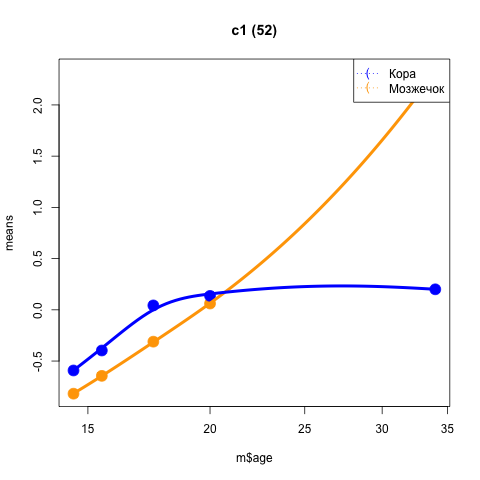

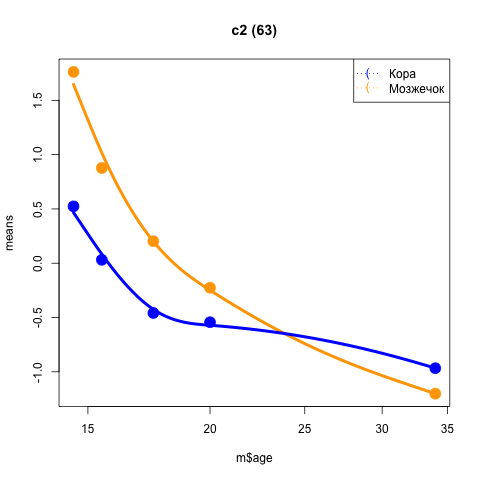

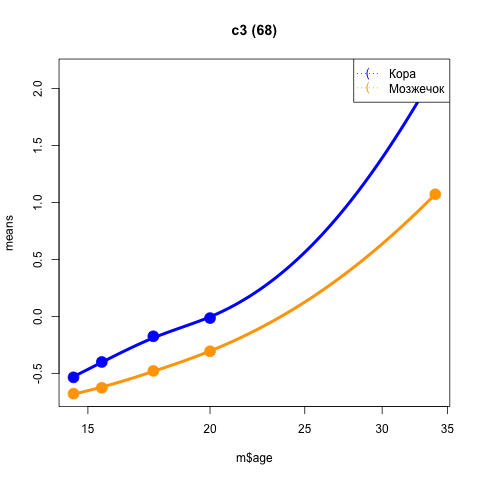

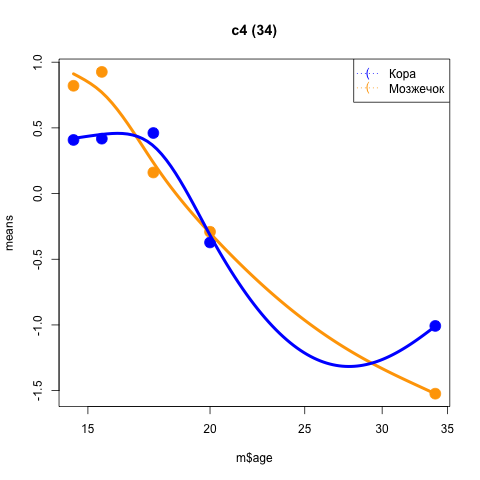

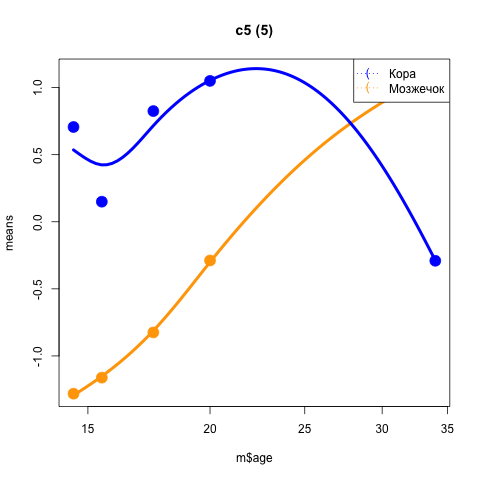

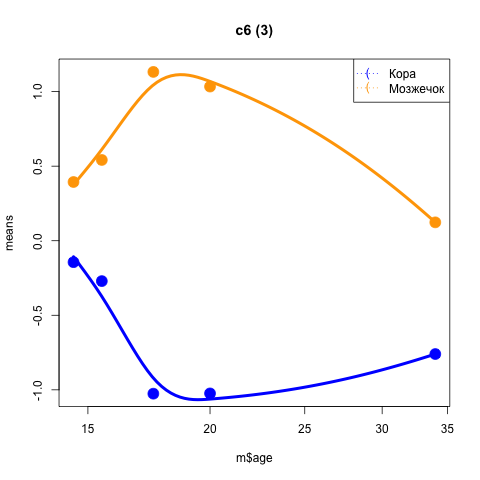

In [163]:
%%R
cpm.s = t(scale(t(cpm.s))) 

# Зависимость среднего z-score от возраста для каждого кластера
# Перебираем кластеры
for(cluster.idx in uni){
  # средние экспресси для данного кластера
  means = apply(cpm.s[cl==cluster.idx, ,drop=F], 2, mean)  # средние экспресси для данного кластера
  plot(m$age, means, pch=19, col=m$col, main=paste0('c', cluster.idx,' (', sum(cl==cluster.idx),')'),log='x',cex=2) #рисуем средние занчения
  for(t in unique(m$tissue)){# перебираем ткани 
    f = m$tissue == t# отбираем образцы относящиеся к данной ткани
    
    ss = smooth.spline(m$age[f], means[f], df=4) # апроксимируем зависимость сплайном
    # интерполируем
    ss = predict(ss, seq(min(m$age), max(m$age), length.out=100))# интерполируем
    lines(ss, lwd=4, col=m$col[f][1]) # рисуем апроксимацию
  }
    
  legend("topright", legend=c("Кора", "Мозжечок"),
         col=c("blue", "orange"), lty=3, pch=40)
}